In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data-01", sep="\t", header=None, names=["Date", "Time","Code","Value"])
print (data["Date"])
data.head()

0      04-21-1991
1      04-21-1991
2      04-21-1991
3      04-21-1991
4      04-21-1991
          ...    
938    09-02-1991
939    09-02-1991
940    09-03-1991
941    09-03-1991
942    09-03-1991
Name: Date, Length: 943, dtype: object


,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [3]:
data['DateTime'] = data['Date'] + " " + data["Time"]
data

,Date,Time,Code,Value,DateTime
0,04-21-1991,9:09,58,100,04-21-1991 9:09
1,04-21-1991,9:09,33,9,04-21-1991 9:09
2,04-21-1991,9:09,34,13,04-21-1991 9:09
3,04-21-1991,17:08,62,119,04-21-1991 17:08
4,04-21-1991,17:08,33,7,04-21-1991 17:08
...,...,...,...,...,...
938,09-02-1991,17:30,33,7,09-02-1991 17:30
939,09-02-1991,23:00,48,155,09-02-1991 23:00
940,09-03-1991,7:20,58,110,09-03-1991 7:20
941,09-03-1991,7:20,33,9,09-03-1991 7:20


In [4]:
data = data.drop_duplicates(subset ="DateTime"
                     , keep='last', inplace = False)


In [5]:
data

,Date,Time,Code,Value,DateTime
2,04-21-1991,9:09,34,13,04-21-1991 9:09
4,04-21-1991,17:08,33,7,04-21-1991 17:08
5,04-21-1991,22:51,48,123,04-21-1991 22:51
8,04-22-1991,7:35,34,13,04-22-1991 7:35
9,04-22-1991,13:40,33,2,04-22-1991 13:40
...,...,...,...,...,...
935,09-02-1991,8:51,34,16,09-02-1991 8:51
936,09-02-1991,13:00,33,4,09-02-1991 13:00
938,09-02-1991,17:30,33,7,09-02-1991 17:30
939,09-02-1991,23:00,48,155,09-02-1991 23:00


In [6]:
data = data.reset_index(drop = True)

In [7]:
data

,Date,Time,Code,Value,DateTime
0,04-21-1991,9:09,34,13,04-21-1991 9:09
1,04-21-1991,17:08,33,7,04-21-1991 17:08
2,04-21-1991,22:51,48,123,04-21-1991 22:51
3,04-22-1991,7:35,34,13,04-22-1991 7:35
4,04-22-1991,13:40,33,2,04-22-1991 13:40
...,...,...,...,...,...
505,09-02-1991,8:51,34,16,09-02-1991 8:51
506,09-02-1991,13:00,33,4,09-02-1991 13:00
507,09-02-1991,17:30,33,7,09-02-1991 17:30
508,09-02-1991,23:00,48,155,09-02-1991 23:00


In [8]:
from datetime import datetime, date 

data['DateTime'] = pd.to_datetime(data.DateTime, format = '%m-%d-%Y %H:%M')

In [9]:
print (data["DateTime"])

0     1991-04-21 09:09:00
1     1991-04-21 17:08:00
2     1991-04-21 22:51:00
3     1991-04-22 07:35:00
4     1991-04-22 13:40:00
              ...        
505   1991-09-02 08:51:00
506   1991-09-02 13:00:00
507   1991-09-02 17:30:00
508   1991-09-02 23:00:00
509   1991-09-03 07:20:00
Name: DateTime, Length: 510, dtype: datetime64[ns]


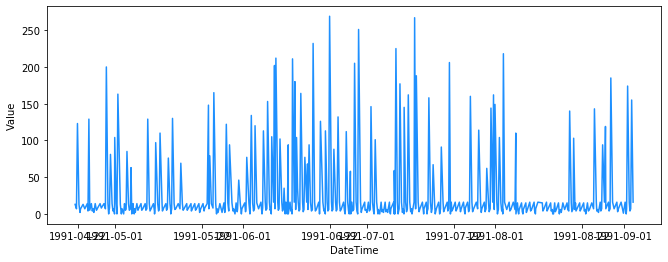

In [10]:
a4_dims = (11, 4)

fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax = ax, x=data.DateTime, y=data.Value,color='dodgerblue' )


In [11]:
thisdict = {33 : "Regular insulin dose",
            34 : "NPH insulin dose",
            35 : "UltraLente insulin dose",
            48 : "Unspecified blood glucose measurement",
            57 : "Unspecified blood glucose measurement",
            58 : "Pre-breakfast blood glucose measurement",
            59 : "Post-breakfast blood glucose measurement",
            60 : "Pre-lunch blood glucose measurement",
            61 : "Post-lunch blood glucose measurement",
            62 : "Pre-supper blood glucose measurement",
            63 : "Post-supper blood glucose measurement",
            64 : "Pre-snack blood glucose measurement",
            65 : "Hypoglycemic symptoms",
            66 : "Typical meal ingestion",
            67 : "More-than-usual meal ingestion",
            68 : "Less-than-usual meal ingestion",
            69 : "Typical exercise activity",
            70 : "More-than-usual exercise activity",
            71 : "Less-than-usual exercise activity",
            72 : "Unspecified special event"}

In [12]:
for i in range(510):
    a = data['Code'][i]
    data['Code'][i] = thisdict[a] 


In [13]:
data

,Date,Time,Code,Value,DateTime
0,04-21-1991,9:09,NPH insulin dose,13,1991-04-21 09:09:00
1,04-21-1991,17:08,Regular insulin dose,7,1991-04-21 17:08:00
2,04-21-1991,22:51,Unspecified blood glucose measurement,123,1991-04-21 22:51:00
3,04-22-1991,7:35,NPH insulin dose,13,1991-04-22 07:35:00
4,04-22-1991,13:40,Regular insulin dose,2,1991-04-22 13:40:00
...,...,...,...,...,...
505,09-02-1991,8:51,NPH insulin dose,16,1991-09-02 08:51:00
506,09-02-1991,13:00,Regular insulin dose,4,1991-09-02 13:00:00
507,09-02-1991,17:30,Regular insulin dose,7,1991-09-02 17:30:00
508,09-02-1991,23:00,Unspecified blood glucose measurement,155,1991-09-02 23:00:00
